# Homework 2

### Deadline: Friday 28 November 2025 (by 21h00)

### Credits: 20 points

### Instructions:

- The quiz is individual. Please include your name in the notebook.


- Within a **single python notebook (.ipynb)**, solve the following problems.

## Name: Mejia Perez Bady Fernando

# Supersonic turbulence: Calculus and Fourier analysis (20 points)

We want to study the properties of 2D (magnetohydrodynamical) turbulent flows using numerical calculus and Fourier analysis. As explained in class, in a turbulence simulation the gas is initially still and has a uniform density distribution. Then, turbulence is generated by appying a time-dependent, spatially-varying, stochastic force field. Such force field continuously injects mechanical energy into the 2D box and maintains supersonic motions during the whole simulation. The gas in this simulation is isothermal, so it is described by this equation of state:

$$p = \rho\,c_{\rm iso}^2$$

where $\rho$ is the gas density and $c_{\rm iso}$ is its isothermal sound speed.

The numerical simulation produces $101$ VTK files stored in:

- the **TURB_DRIVE_SUP_hr** folder: 

https://www.dropbox.com/scl/fo/aip4lo4983phsyd5tcn77/AD9ArKNSlPzlEpQxsnnRPWA/TURB_DRIVE_SUP_hr?rlkey=m4ragdal7lagwczhtkvyqj0ty&subfolder_nav_tracking=1&st=236scsha&dl=0

jointly with:

- a **units.out** file that contains the CGS normalisation values and the CGS value of the isothermal sound speed.
- a **vtk.out** file whose second column contains the times in code units.
- a **grid.out** file that contains information on the grid structure.

You can use VisIt to inspect the data. The written fields are: 

- density (rho)
- velocity_x (vx1)
- velocity_y (vx2)
- magnetic_field_x (Bx1)
- magnetic_field_y (Bx2)

**Reference paper:**
https://arxiv.org/pdf/0710.1359








## 1. (5 points) Numerical calculus:

(a) Create a set of Python functions that reads in the simulation data, normalises the data fields to CGS units (using units.out), returns all the data arrays and the mesh, and sequentially prints the following figures into a folder called **"output_n"** for all times:

- Thermal pressure, $p = \rho\,c_{\rm iso}^2$





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pyvista as pv
import gc
ubication_principal=os.getcwd()

def read_file(name):
    file=ubication_principal+'/TURB_DRIVE_SUP_hr/'
    data=pd.DataFrame(pd.read_csv(file+name))
    rho=data.loc[0,'normalisation']
    v=data.loc[1,'normalisation']
    l=data.loc[2,'normalisation']
    c=data.loc[3,'normalisation']
    for i in range(4):
        print('************************')
        print(f'the {data.loc[i,'variable']} = {data.loc[i,'normalisation']} {data.loc[i,'units']}')
    return rho,v,l,c

    
rho,v0,l0,c_iso=read_file('units.out')


************************
the rho_0 = 1.66e-24 g/cm^3
************************
the v_0 = 1000000.0 cm/s
************************
the L_0 = 3.086e+18 cm
************************
the c_iso = 1000000.0 cm/s


In [3]:
# Normalize the pressure
p_norm=rho*(c_iso**2)
print(f'the presure is {p_norm} in g/(cm*s^2)')

the presure is 1.66e-12 in g/(cm*s^2)


In [4]:
## for read the vtk.out for time
def read_time(name):
    file=ubication_principal+'/TURB_DRIVE_SUP_hr/'
    data=pd.DataFrame(pd.read_csv(file+name,sep=' ',header=None))
    time=np.array(data[1])
    return time
# don't forgate that we have to normalize with velocity and length
t0=read_time('vtk.out')*(l0/v0)

    

In [5]:
#calculus of normalization for fiel magnetic
B=v0*np.sqrt(4*np.pi*rho)
B

np.float64(4.5672940807261605e-06)

In [6]:

def read_vtk(name):
    file=ubication_principal+'/TURB_DRIVE_SUP_hr/'
    data=pv.read(file+name)
    local_rho=data.get_array('rho')*rho
    vx=data.get_array('vx1')*v0
    vy=data.get_array('vx2')*v0
    bx=data.get_array('Bx1')*B
    by=data.get_array('Bx2')*B
    time=t0[int(name[5:9])]
    ##3 for create the meshure 
    data.x=data.x*l0
    data.y=data.y*l0
    data.z=data.z*l0
    dic={'rho':local_rho,'vx':vx,'vy':vy,'bx':bx,'by':by,'time':time}
    return data,dic


################ for graphics the data###########3
# chance the dimension for simulate

# adapt to in 2d the  variable

In [6]:
# for make each imagen according the data from file .vtk
def simulation_pressure(name):
    
    data1,dics=read_vtk(name)
    x=np.linspace(l0*data1.bounds[0],l0*data1.bounds[1],data1.dimensions[0]-1)
    y=np.linspace(l0*data1.bounds[2],l0*data1.bounds[3],data1.dimensions[1]-1)
    x2d,y2d=np.meshgrid(x,y)
    #### variable
    press=(dics['rho'])*(((dics['vx'])**2)+((dics['vy'])**2))
    press2d=press.reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)
    #for make the image
    fig,ax=plt.subplots(figsize=(5,5))
    mesh=ax.pcolor(x2d,y2d,press2d,cmap='magma_r')
    plt.colorbar(mesh,ax=ax,label='press')
    ax.set_title(f'file: {name}')
    ax.set_xlabel(f't(s)={dics['time']:.3e}')
    plt.savefig(name[:-4]+'.jpg')
    plt.close(fig)
    try:
        del data1
        del dics
        del x
        del y
        del x2d
        del y2d
        del press
        del press2d
    except NameError:
        pass

    gc.collect()

    




In [7]:
### Generator of imagen for each file
os.makedirs('output_n',exist_ok=True)
os.chdir('output_n')
os.makedirs('pressure',exist_ok=True)
os.chdir('pressure')

for i in range(len(t0)):
    name_n=f'data.{i:04d}.vtk'
    simulation_pressure(name_n)


os.chdir('..')
os.chdir('..')



In [7]:
### for gif simulation 
from IPython import display
import glob
from PIL import Image
def gif_simulation(folder,name_gif):
    os.chdir('output_n')
    
    img_de=f'./{folder}/data.****.jpg'
    img_out=name_gif
    img=(Image.open(f) for f in sorted(glob.glob(img_de)))
    im=next(img)
    im.save(fp=img_out,format='GIF',append_images=img,save_all=True,duration=100,loop=0)
    display.Image(open(f'{name_gif}','rb').read())
    
    os.chdir('..')

gif_simulation('pressure','animation_pressure.gif')


## the animation was saved in folder output_n how (animation_pressure.gif)


- Velocity curl (vorticity) magnitude, $|\vec\nabla\times \vec v|$  = 
$\left| \frac{\partial v_y}{\partial x} - \frac{\partial v_x}{\partial y} \right|$


In [9]:
# for make each imagen according the data from file .vtk
def simulation_Velocity_curl(name):
    
    data1,dics=read_vtk(name)

    x=np.linspace(l0*data1.bounds[0],l0*data1.bounds[1],data1.dimensions[0]-1)
    y=np.linspace(l0*data1.bounds[2],l0*data1.bounds[3],data1.dimensions[1]-1)
    x2d,y2d=np.meshgrid(x,y)
    #### variable

    vx=dics['vx'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)
    vy=dics['vy'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)
    
    dx=x[1]-x[0]
    dy=y[1]-y[0]

    #for calculate the gradiant
    dvx=np.zeros_like(vx)
    dvy=np.zeros_like(vy)

    dvx[1:-1,:]=(vx[2:,:]-vx[:-2,:])/(2*dy)
    dvy[:,1:-1]=(vy[:,2:]-vy[:,:-2])/(2*dx)
## for only (y) bounds
    dvx[0,:]=(vx[1,:]-vx[0,:])/dy
    dvx[-1,:]=(vx[-1,:]-vx[-2,:])/dy

#for bounds of x
    dvy[:,0]=(vy[:,1]-vy[:,0])/dx
    dvy[:,-1]=(vy[:,-1]-vy[:,-2])/dx

    velocity=np.abs(dvy-dvx)

    #for make the image
    fig,ax=plt.subplots(figsize=(5,5))
    mesh=ax.pcolormesh(x2d,y2d,velocity,cmap='magma_r')
    plt.colorbar(mesh,ax=ax,label='vorticity')
    ax.set_title(f'vorticity of file: {name}')
    ax.set_xlabel(f't(s)={dics['time']:.3e}')
    plt.savefig(name[:-4]+'.jpg')
    plt.close(fig)
    try:
        del data1
        del dics
        del x
        del y
        del x2d
        del y2d
        del dvx
        del dvy
        del velocity
        del vx
        del vy
    except NameError:
        pass

    gc.collect()

 




In [10]:
### Generator of imagen for each file
os.makedirs('output_n',exist_ok=True)
os.chdir('output_n')
os.makedirs('vorticity',exist_ok=True)
os.chdir('vorticity')

for i in range(len(t0)):
    name_n=f'data.{i:04d}.vtk'
    simulation_Velocity_curl(name_n)


os.chdir('..')
os.chdir('..')

In [11]:
gif_simulation('vorticity','animation_vorticity.gif')


## the animation was saved in folder output_n how (animation_vorticity.gif)


- Magnetic pressure gradient, $\vec{\nabla}P_B$ where $P_B=\frac{B^2}{8\pi}$ is the magnetic pressure.


In [12]:
# for make each imagen according the data from file .vtk
def simulation_Magnetic(name):
    
    data1,dics=read_vtk(name)

    x=np.linspace(l0*data1.bounds[0],l0*data1.bounds[1],data1.dimensions[0]-1)
    y=np.linspace(l0*data1.bounds[2],l0*data1.bounds[3],data1.dimensions[1]-1)
    x2d,y2d=np.meshgrid(x,y)
    #### variable

    bx=dics['bx'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)
    by=dics['by'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)

    #calculus of magnetic
    B_s=(bx**2)+(by**2)
    magnetic=B_s/(8*np.pi)

    ## calculus
    dpdy,dpdx=np.gradient(magnetic,y,x)
    #magnitud of magnetic
    magnitud=np.sqrt((dpdy**2)+(dpdx**2))
    #for make the image
    fig,ax=plt.subplots(figsize=(6,6))
    mesh=ax.quiver(x2d,y2d,dpdx,dpdy,magnitud,cmap='magma_r')
    plt.colorbar(mesh,ax=ax,label='Magnetic pressure ')
    ax.set_title(f'Magnetic pressure gradient of file: {name}')
    ax.set_xlabel(f't(s)={dics['time']:.3e}')
    plt.savefig(name[:-4]+'.jpg')
    plt.close(fig)
    try:
        del data1
        del dics
        del x
        del y
        del x2d
        del y2d
        del dpdy
        del dpdx
        del magnitud
        del bx
        del by
        del B_s
    except NameError:
        pass

    gc.collect()





In [13]:
### Generator of imagen for each file
os.makedirs('output_n',exist_ok=True)
os.chdir('output_n')
os.makedirs('Magnetic pressure',exist_ok=True)
os.chdir('Magnetic pressure')

for i in range(len(t0)):
    name_n=f'data.{i:04d}.vtk'
    simulation_Magnetic(name_n)


os.chdir('..')
os.chdir('..')

In [14]:
gif_simulation('Magnetic pressure','animation_Magnetic pressure.gif')




Add time-stamps in CGS units to the above maps (using information from vkt.out). Show sample maps at a fixed time (VTK file # 50) in this notebook.

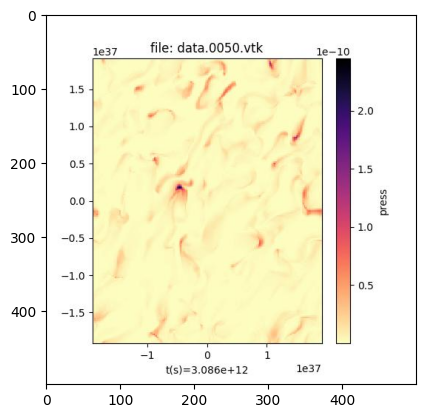

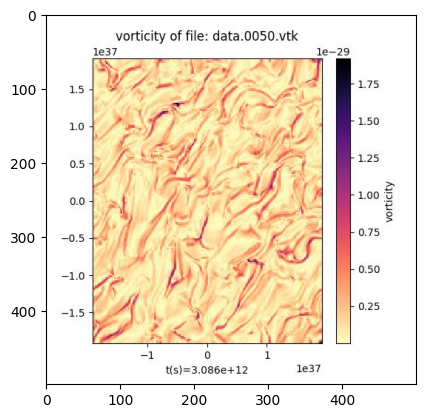

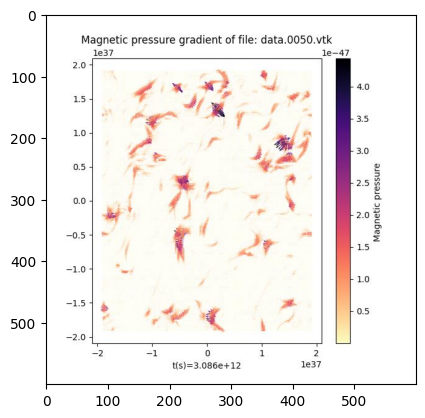

In [15]:
import matplotlib.image as mping
pressure=mping.imread(ubication_principal+'/output_n/pressure/data.0050.jpg')
vorticity=mping.imread(ubication_principal+'/output_n/vorticity/data.0050.jpg')
Mag=mping.imread(ubication_principal+'/output_n/Magnetic pressure/data.0050.jpg')

plt.figure()

plt.imshow(pressure)

plt.show()

plt.figure()

plt.imshow(vorticity)

plt.show()
plt.figure()

plt.imshow(Mag)

plt.show()



(b) Create a set of Python functions that loops over all the simulation VTK files, computes the flow circulation, $\Gamma = \iint_S \vec\nabla\times \vec v \cdot \mathrm{d}\mathbf{S}$, and returns:



- a CSV file with 2 columns (time and flow circulation).


In [16]:
# for make each imagen according the data from file .vtk
flow=[]
def flow_circulation(name):
    
    data1,dics=read_vtk(name)

    x=np.linspace(l0*data1.bounds[0],l0*data1.bounds[1],data1.dimensions[0]-1)
    y=np.linspace(l0*data1.bounds[2],l0*data1.bounds[3],data1.dimensions[1]-1)
    x2d,y2d=np.meshgrid(x,y)
    dx=x[1]-x[0] 
    dy=y[1]-y[0]

    #### variable in 2d

    vx=dics['vx'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)
    vy=dics['vy'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)

    #calculus of circulation
    dvx_dy=np.gradient(vx,dy,axis=0)
    dvy_dx=np.gradient(vy,dx,axis=1)
    verti=dvy_dx-dvx_dy
    cir=np.sum(verti)*dx*dy


    flow.append([dics['time'],cir])
    
    try:
        del data1
        del dics
        del x
        del y
        del x2d
        del y2d
        del dx
        del dy
        del vx
        del vy
        del bdvx_dy,dvx_dx,dvy_dy,dvy_dx
        del vor,cir
    except NameError:
        pass

    gc.collect()

for i in range(len(t0)):
    name_n=f'data.{i:04d}.vtk'
    flow_circulation(name_n)



In [17]:
flow2=np.array(flow)
flow_dic={'time':flow2[:,0],'flow circulation':flow2[:,1]}
pd_save=pd.DataFrame(flow_dic)
os.chdir('output_n')
pd_save.to_csv('flow circulation.csv',index=False)
os.chdir('..')

- a figure of the flow circulation versus time. Show the resulting figure in this notebook too.


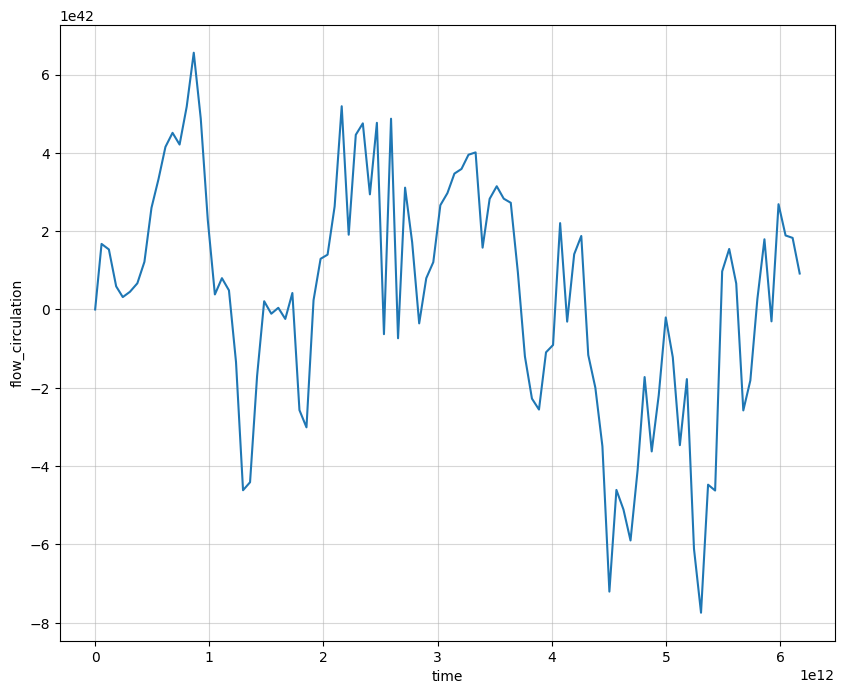

In [22]:
plt.figure(figsize=(10,8))
plt.plot(pd_save['time'],pd_save['flow circulation'])
plt.grid(True,alpha=0.5)
plt.ylabel('flow_circulation')
plt.xlabel('time')
plt.show()

## 2. (5 points) Shock analysis:

(c) Create a set of Python functions that isolate candidate shocked cells based on the following methods and sequentially prints the following shock candidate maps into a folder called **"output_s"** for all times:

### - **Method 1:** Read the 2D velocity vector field. Compute the divergence of the velocity field and isolate the cells where there are convergent flows (i.e. where      $\vec\nabla\cdot \vec v <\alpha$ with $\alpha\lesssim 0$). Cells with convergent flows are candidate shocked cells.


In [77]:
# for make each imagen according the data from file .vtk
def method1(name):
    
    data1,dics=read_vtk(name)

    x=np.linspace(l0*data1.bounds[0],l0*data1.bounds[1],data1.dimensions[0]-1)
    y=np.linspace(l0*data1.bounds[2],l0*data1.bounds[3],data1.dimensions[1]-1)
    x2d,y2d=np.meshgrid(x,y)
    dx=x[1]-x[0] 
    dy=y[1]-y[0]

    #### variable in 2d

    vx=dics['vx'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)
    vy=dics['vy'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)

    #calculus of circulation
    dvx_dx, dvx_dy = np.gradient(vx, dx, dy)
    dvy_dx, dvy_dy = np.gradient(vy, dx, dy)
    
    divergence = dvx_dx + dvy_dy
    shock=divergence<0


    fig,ax=plt.subplots(2,1,figsize=(6,12))
    ## for normla grafic
    mesh1=ax[0].pcolor(x2d,y2d,divergence,cmap='magma_r')
    plt.colorbar(mesh1,ax=ax[0],label='vorticity ')

    ax[0].set_title(f'Divergence of the velocity of file: {name}')
    ax[0].set_xlabel(f't(s)={dics['time']:.3e}')

    ## with filter
    mesh2=ax[1].quiver(x2d,y2d,divergence*shock,cmap='viridis')
    plt.colorbar(mesh2,ax=ax[1],label='vorticity ')

    ax[1].set_title(f'shocked cells of file: {name}')
    ax[1].set_xlabel(f't(s)={dics['time']:.3e}')
    plt.savefig(name[:-4]+'.jpg')
    
    plt.close(fig)
    try:
        del data1
        del dics
        del x
        del y
        del x2d
        del y2d
        del vx
        del vy
        del dvx_dx, dvx_dy,dvy_dx, dvy_dy,divergence,shock
    except NameError:
        pass

    gc.collect()


# for make the simulation 
def gif_simulation2(folder,name_gif):
    os.chdir('output_s')
    
    img_de=f'./{folder}/data.****.jpg'
    img_out=name_gif
    img=(Image.open(f) for f in sorted(glob.glob(img_de)))
    im=next(img)
    im.save(fp=img_out,format='GIF',append_images=img,save_all=True,duration=100,loop=0)
    display.Image(open(f'{name_gif}','rb').read())
    
    os.chdir('..')

In [74]:
os.makedirs('output_s',exist_ok=True)
os.chdir('output_s')
os.makedirs('Method 1',exist_ok=True)
os.chdir('Method 1')

for i in range(len(t0)):
    name_n=f'data.{i:04d}.vtk'
    method1(name_n)


os.chdir('..')
os.chdir('..')

In [75]:
gif_simulation2('Method 1','animation_Method 1.gif')


- **Method 2:** Read the 2D pressure field. Compute the gradient of the thermal pressure and isolate the cells with large pressure gradients (i.e. where $\frac{|\vec\nabla P|}{P}>\beta\max{\left(\frac{|\vec\nabla P|}{P}\right)}$ with $\beta \lesssim 0.1$). Such cells are candidate shocked cells.

In [80]:
# for make each imagen according the data from file .vtk
def method2(name):
    
    data1,dics=read_vtk(name)

    x=np.linspace(l0*data1.bounds[0],l0*data1.bounds[1],data1.dimensions[0]-1)
    y=np.linspace(l0*data1.bounds[2],l0*data1.bounds[3],data1.dimensions[1]-1)
    x2d,y2d=np.meshgrid(x,y)
    #### variable

    bx=dics['bx'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)
    by=dics['by'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)

    #calculus of magnetic
    B_s=(bx**2)+(by**2)
    magnetic=B_s/(8*np.pi)

    ## calculus
    grad_p_y, grad_p_x = np.gradient(magnetic, y, x)
    grad_p_magnitude = np.sqrt(grad_p_x**2 + grad_p_y**2)

    final_condition=grad_p_magnitude/magnetic
    cell_clean=final_condition>(0.1*(np.max(final_condition)))

    #for make the image
    fig,ax=plt.subplots(2,1,figsize=(6,12))
    ## for normla grafic
    mesh1=ax[0].quiver(x2d,y2d,grad_p_x,grad_p_y,grad_p_magnitude,cmap='magma_r')
    plt.colorbar(mesh1,ax=ax[0],label='Magnetic pressure ')

    ax[0].set_title(f'Magnetic pressure gradient of file: {name}')
    ax[0].set_xlabel(f't(s)={dics['time']:.3e}')

    ## with filter
    mesh2=ax[1].quiver(x2d,y2d,grad_p_x,grad_p_y,grad_p_magnitude*cell_clean,cmap='magma_r')
    plt.colorbar(mesh2,ax=ax[1],label='Magnetic pressure ')

    ax[1].set_title(f'shocked cells of file: {name}')
    ax[1].set_xlabel(f't(s)={dics['time']:.3e}')
    plt.savefig(name[:-4]+'.jpg')
    
    plt.close(fig)
    try:
        del data1
        del dics
        del x
        del y
        del x2d
        del y2d
        del by
        del bx
        del magnetic
        del grad_p_y, grad_p_x
        del B_s
        del cell_clean,final_condition,grad_p_magnitude
    except NameError:
        pass

    gc.collect()
    





In [81]:
os.makedirs('output_s',exist_ok=True)
os.chdir('output_s')
os.makedirs('Method 2',exist_ok=True)
os.chdir('Method 2')

for i in range(len(t0)):
    name_n=f'data.{i:04d}.vtk'
    method2(name_n)


os.chdir('..')
os.chdir('..')

In [82]:
gif_simulation2('Method 2','animation_Method 2.gif')





(d) Make binary maps of the resulting candidate shock cells from both methods. Show sample maps at a fixed time (VTK file # 50) in this notebook.

In [ ]:
# for make each imagen according the data from file .vtk
def method1_binary(name):
    
    data1,dics=read_vtk(name)

    x=np.linspace(l0*data1.bounds[0],l0*data1.bounds[1],data1.dimensions[0]-1)
    y=np.linspace(l0*data1.bounds[2],l0*data1.bounds[3],data1.dimensions[1]-1)
    x2d,y2d=np.meshgrid(x,y)
    dx=x[1]-x[0] 
    dy=y[1]-y[0]

    #### variable in 2d

    vx=dics['vx'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)
    vy=dics['vy'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)

    #calculus of circulation
    dvx_dx, dvx_dy = np.gradient(vx, dx, dy)
    dvy_dx, dvy_dy = np.gradient(vy, dx, dy)
    
    divergence = dvx_dx + dvy_dy
    shock=divergence<0


    fig,ax=plt.subplots(2,1,figsize=(6,12))
    ## for normla grafic
    mesh1=ax[0].pcolor(x2d,y2d,divergence,cmap='magma_r')
    plt.colorbar(mesh1,ax=ax[0],label='vorticity ')

    ax[0].set_title(f'Divergence of the velocity of file: {name}')
    ax[0].set_xlabel(f't(s)={dics['time']:.3e}')

    ## with filter
    mesh2=ax[1].quiver(x2d,y2d,shock,cmap='gray')
    plt.colorbar(mesh2,ax=ax[1],label='vorticity ')

    ax[1].set_title(f'shocked cells of file: {name}')
    ax[1].set_xlabel(f't(s)={dics['time']:.3e}')
    plt.show()
    plt.close(fig)
    try:
        del data1
        del dics
        del x
        del y
        del x2d
        del y2d
        del vx
        del vy
        del dvx_dx, dvx_dy,dvy_dx, dvy_dy,divergence,shock
    except NameError:
        pass

    gc.collect()


# for make each imagen according the data from file .vtk
def method2_binary(name):
    
    data1,dics=read_vtk(name)

    x=np.linspace(l0*data1.bounds[0],l0*data1.bounds[1],data1.dimensions[0]-1)
    y=np.linspace(l0*data1.bounds[2],l0*data1.bounds[3],data1.dimensions[1]-1)
    x2d,y2d=np.meshgrid(x,y)
    #### variable

    bx=dics['bx'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)
    by=dics['by'].reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)

    #calculus of magnetic
    B_s=(bx**2)+(by**2)
    magnetic=B_s/(8*np.pi)

    ## calculus
    grad_p_y, grad_p_x = np.gradient(magnetic, y, x)
    grad_p_magnitude = np.sqrt(grad_p_x**2 + grad_p_y**2)

    final_condition=grad_p_magnitude/magnetic
    cell_clean=final_condition>(0.1*(np.max(final_condition)))

    #for make the image
    fig,ax=plt.subplots(2,1,figsize=(6,12))
    ## for normla grafic
    mesh1=ax[0].quiver(x2d,y2d,grad_p_x,grad_p_y,grad_p_magnitude,cmap='magma_r')
    plt.colorbar(mesh1,ax=ax[0],label='Magnetic pressure ')

    ax[0].set_title(f'Magnetic pressure gradient of file: {name}')
    ax[0].set_xlabel(f't(s)={dics['time']:.3e}')

    ## with filter
    mesh2=ax[1].quiver(x2d,y2d,grad_p_x,grad_p_y,cell_clean,cmap='grey')
    plt.colorbar(mesh2,ax=ax[1],label='Magnetic pressure ')

    ax[1].set_title(f'shocked cells of file: {name}')
    ax[1].set_xlabel(f't(s)={dics['time']:.3e}')
    plt.show()
    plt.close(fig)
    try:
        del data1
        del dics
        del x
        del y
        del x2d
        del y2d
        del by
        del bx
        del magnetic
        del grad_p_y, grad_p_x
        del B_s
        del cell_clean,final_condition,grad_p_magnitude
    except NameError:
        pass

    gc.collect()

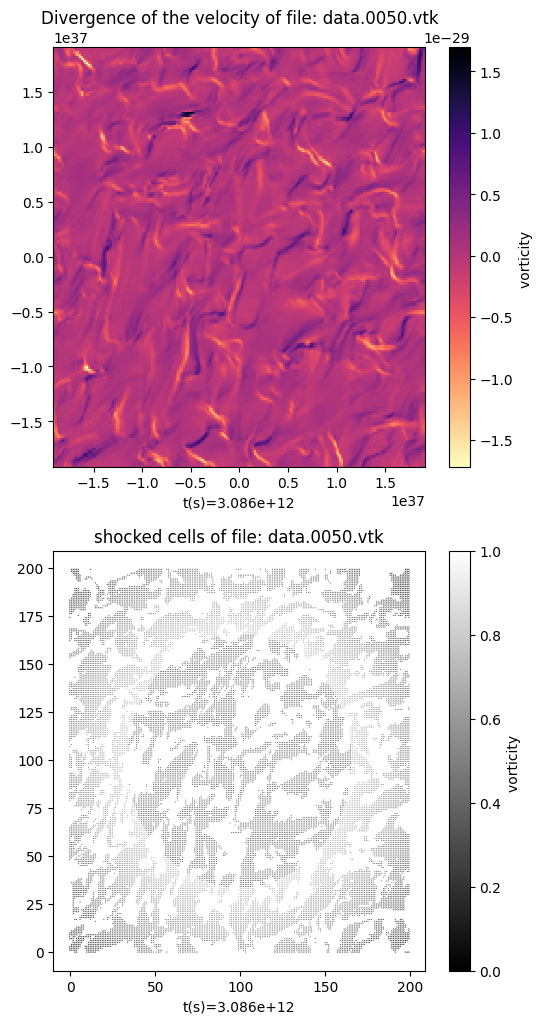

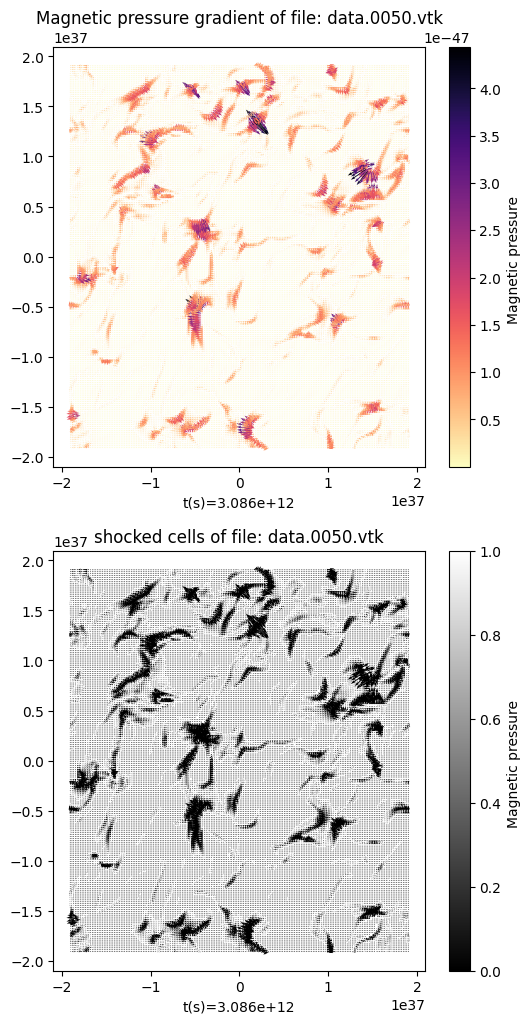

In [87]:
method1_binary('data.0050.vtk')
method2_binary('data.0050.vtk')

## 3. (5 points) Fourier analysis:

(e) Create a set of Python functions that Fourier transforms the thermal pressure of any VTK file in 2D, applies high-pass and low-pass filters, smooths the pressure map using a 2D Gaussian, and sequentially prints the following figures into a folder called **"output_f"** for all times:

- the 2D Fourier image of the thermal pressure




In [13]:
# for make each imagen according the data from file .vtk
def fourier_cal(name):
    
    data1,dics=read_vtk(name)
    x=np.linspace(l0*data1.bounds[0],l0*data1.bounds[1],data1.dimensions[0]-1)
    y=np.linspace(l0*data1.bounds[2],l0*data1.bounds[3],data1.dimensions[1]-1)
    x2d,y2d=np.meshgrid(x,y)## consider to eliminate
    dx=x[1]-x[0]
    dy=y[1]-y[0]
    #### variable
    press=(dics['rho'])*(((dics['vx'])**2)+((dics['vy'])**2))
    press2d=press.reshape(data1.dimensions[0]-1,data1.dimensions[1]-1)
    
    # fourier transform
    fourier=np.fft.fft2(press2d)
    filter=fourier.copy() ## for apply my filter

    shift_norm=np.abs(np.fft.fftshift(fourier))
    ### frecuencies
    freq_x=np.fft.fftfreq(press2d.shape[0],d=dx)
    freq_y=np.fft.fftfreq(press2d.shape[1],d=dy)
    # make it 2d with meshgrid
    freq_x2d,freq_y2d=np.meshgrid(sorted(freq_x),sorted(freq_y))
    set_data=np.array([[x2d,y2d,press2d],[freq_x2d,freq_y2d,shift_norm]])
    return name,dics,set_data


    try:
        del data1
        del dics
        del x
        del y
        del x2d
        del y2d
        del press
        del press2d
    except NameError:
        pass

    gc.collect()

    
def graphics_fourier(name,dics,set_data):
    fig,ax=plt.subplots(2,1,figsize=(6,12))

    mesh1=ax[0].pcolor(set_data[0,0],set_data[0,1],set_data[0,2],cmap='magma_r')
    plt.colorbar(mesh1,ax=ax[0],label='press')
    ax[0].set_title(f'file: {name} in t(s)={dics['time']:.3e}')

    mesh2=ax[1].pcolor(set_data[1,0],set_data[1,1],np.log10(set_data[1,2]),cmap="plasma",vmin=-11,vmax=-8,shading="auto")
    plt.colorbar(mesh2,ax=ax[1],label='frecuency')
    ax[1].set_title(f'fourier file: {name}')
    ax[1].set_xlabel(f'k')

    plt.savefig(name[:-4]+'.jpg')
    plt.close(fig)


def gif_simulation_fourier(folder,name_gif):
    os.chdir('output_f')
    
    img_de=f'./{folder}/data.****.jpg'
    img_out=name_gif
    img=(Image.open(f) for f in sorted(glob.glob(img_de)))
    im=next(img)
    im.save(fp=img_out,format='GIF',append_images=img,save_all=True,duration=100,loop=0)
    display.Image(open(f'{name_gif}','rb').read())
    
    os.chdir('..')

In [12]:
os.makedirs('output_f',exist_ok=True)
os.chdir('output_f')
os.makedirs('2D Fourier',exist_ok=True)
os.chdir('2D Fourier')

for i in range(len(t0)):
    name_n=f'data.{i:04d}.vtk'
    name_n,di,fft=fourier_cal(name_n)
    graphics_fourier(name_n,di,fft)


os.chdir('..')
os.chdir('..')

/tmp/ipykernel_4153/789786671.py:50: RuntimeWarning: divide by zero encountered in log10
  mesh2=ax[1].pcolor(set_data[1,0],set_data[1,1],np.log10(set_data[1,2]),cmap="plasma",vmin=-11,vmax=-8,shading="auto")


In [14]:
gif_simulation_fourier("2D Fourier","animation_2d_fourier.gif")


- the high-pass filter map



- the low-pass filter map



- the Gaussian-blurred map



Show sample maps at a fixed time (VTK file # 50) in this notebook.

(f) Create a Python function that reads in the images you wrote, and returns movies showing the time evolution of the magnetic pressure gradient maps computed in (a), the high-pass filter maps in (e), and the flow circulation in (b).



## 4. (5 points) Interpretation:

(g) Based on your analyses above, briefly answer the following questions (**in your own words**): 

- What information do the velocity curl and magnetic pressure gradient provide about the flow in section 1?

- Does the flow circulation reach steady state in section 1?

- Do you find the same shock candidates on the maps obtained by Methods 1 and 2 in section 2?
  
- What do the high-pass and low-pass filter maps show in section 3?
  
- Are the low-pass and Gaussing blurring results consistent with one another in section 3?